In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
from pathlib import Path
import warnings
import os
import random
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler

warnings.simplefilter('ignore')

In [2]:
def fix_all_seeds(seed):
    np.random.seed(seed)
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    
fix_all_seeds(0)

# データ読み込み

In [3]:
train = pd.read_pickle("/content/drive/MyDrive/Kaggle/BlueCarbon/proc/train.pkl")
test = pd.read_pickle("/content/drive/MyDrive/Kaggle/BlueCarbon/proc/test.pkl")

# 可視化

### Landsat指標毎の目的変数の分布

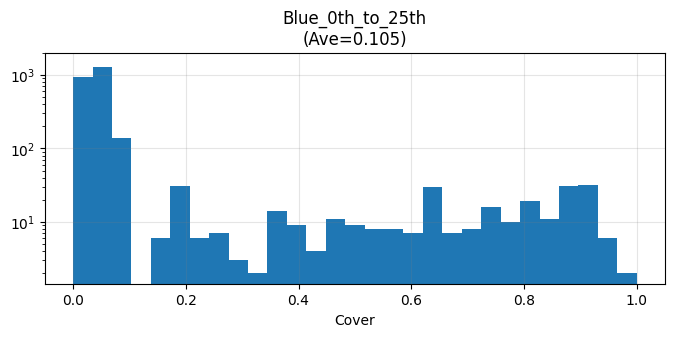

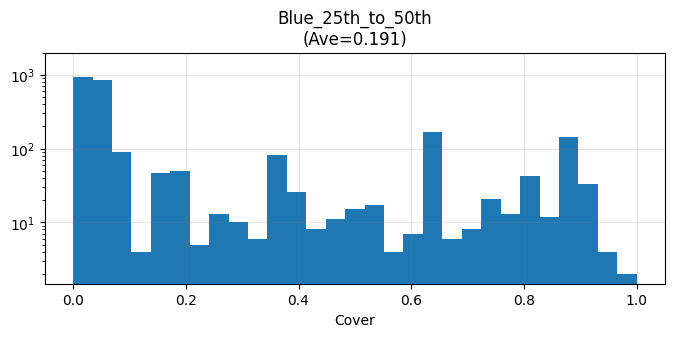

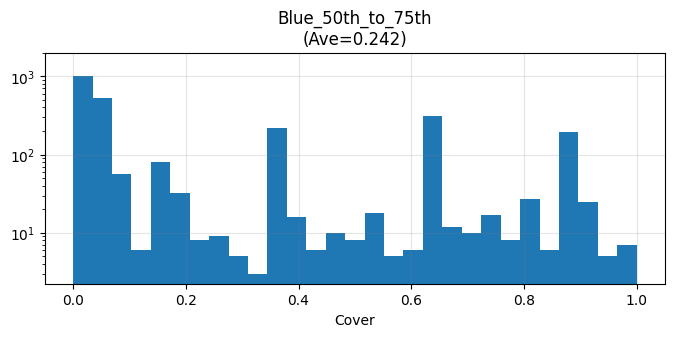

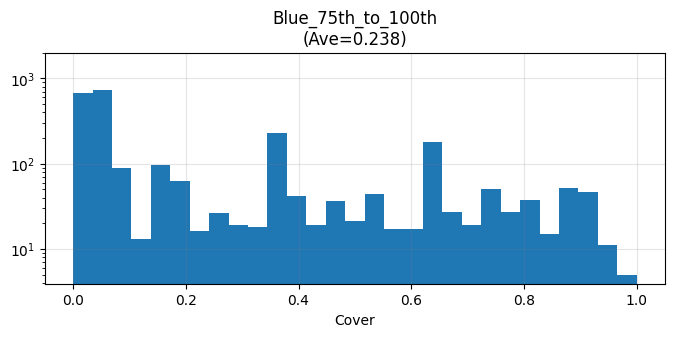

In [13]:
# Blueを使う
col = "Blue"

p25 = train[col].quantile(0.25)
p50 = train[col].quantile(0.5)
p75 = train[col].quantile(0.75)

list_percentile = [p25, p50, p75]
bins = np.linspace(0, 1, 30)

for i in range(4):
    if i == 0:
        tmp = train.loc[train[col]<p25, "cover"]
    elif i == 3:
        tmp = train.loc[train[col]>p75, "cover"]
    else:
        tmp = train.loc[(train[col]>list_percentile[i-1])&(train[col]<list_percentile[i]), "cover"]
    fig, ax = plt.subplots(figsize=(8, 3))
    ax.grid(alpha=0.2, color="gray")
    ax.hist(tmp, bins=bins)
    ax.set_title(f"Blue_{25*i}th_to_{25*(i+1)}th\n(Ave={tmp.mean():.3f})")
    ax.set_xlabel("Cover")
    ax.set_yscale("log")
    ax.set_ylim([0, 2000])
    plt.show()

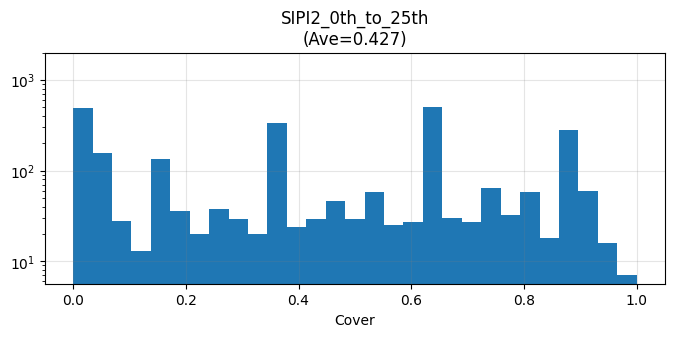

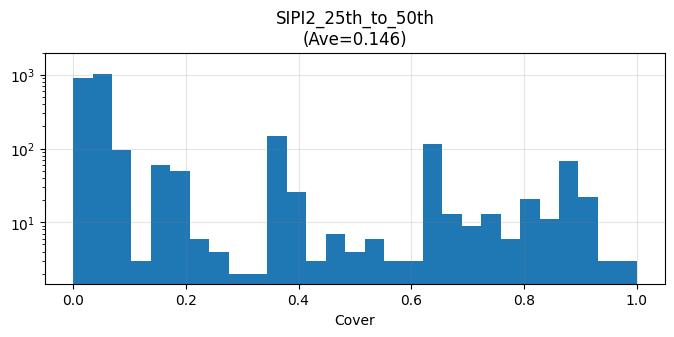

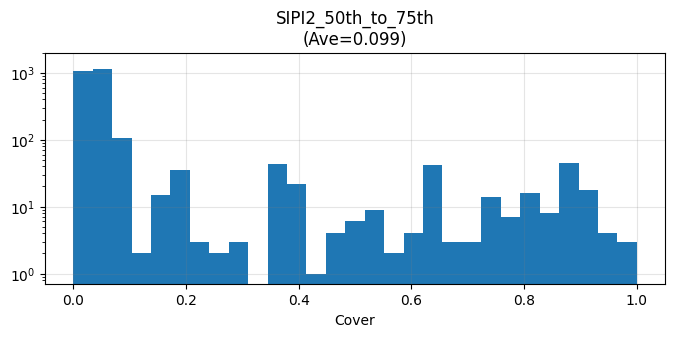

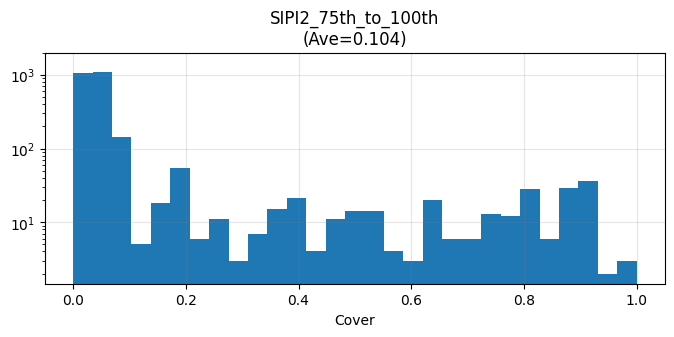

In [16]:
col = "SIPI2"

p25 = train[col].quantile(0.25)
p50 = train[col].quantile(0.5)
p75 = train[col].quantile(0.75)

list_percentile = [p25, p50, p75]
bins = np.linspace(0, 1, 30)

for i in range(4):
    if i == 0:
        tmp = train.loc[train[col]<p25, "cover"]
    elif i == 3:
        tmp = train.loc[train[col]>p75, "cover"]
    else:
        tmp = train.loc[(train[col]>list_percentile[i-1])&(train[col]<list_percentile[i]), "cover"]
    fig, ax = plt.subplots(figsize=(8, 3))
    ax.grid(alpha=0.2, color="gray")
    ax.hist(tmp, bins=bins)
    ax.set_title(f"{col}_{25*i}th_to_{25*(i+1)}th\n(Ave={tmp.mean():.3f})")
    ax.set_xlabel("Cover")
    ax.set_yscale("log")
    ax.set_ylim([0, 2000])
    plt.show()

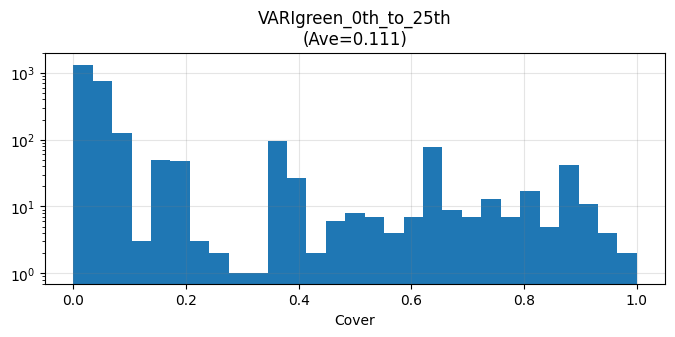

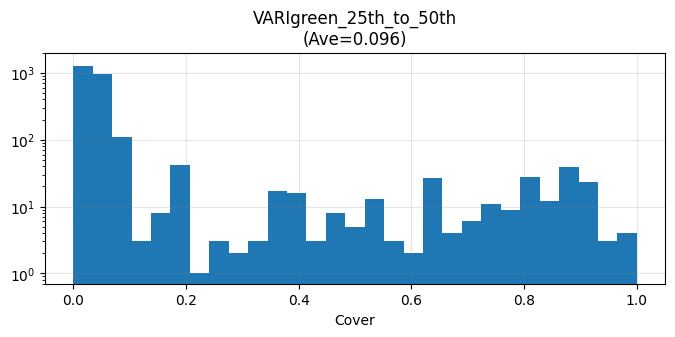

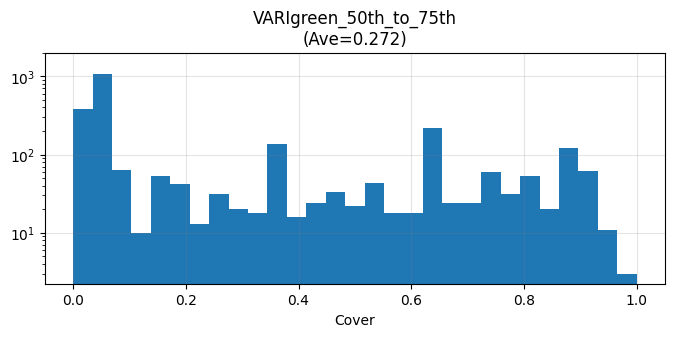

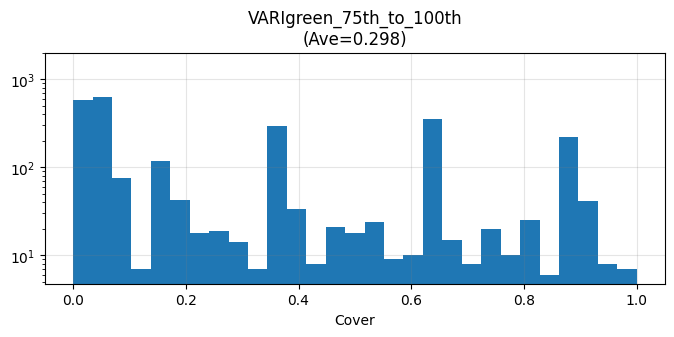

In [17]:
col = "VARIgreen"

p25 = train[col].quantile(0.25)
p50 = train[col].quantile(0.5)
p75 = train[col].quantile(0.75)

list_percentile = [p25, p50, p75]
bins = np.linspace(0, 1, 30)

for i in range(4):
    if i == 0:
        tmp = train.loc[train[col]<p25, "cover"]
    elif i == 3:
        tmp = train.loc[train[col]>p75, "cover"]
    else:
        tmp = train.loc[(train[col]>list_percentile[i-1])&(train[col]<list_percentile[i]), "cover"]
    fig, ax = plt.subplots(figsize=(8, 3))
    ax.grid(alpha=0.2, color="gray")
    ax.hist(tmp, bins=bins)
    ax.set_title(f"{col}_{25*i}th_to_{25*(i+1)}th\n(Ave={tmp.mean():.3f})")
    ax.set_xlabel("Cover")
    ax.set_yscale("log")
    ax.set_ylim([0, 2000])
    plt.show()

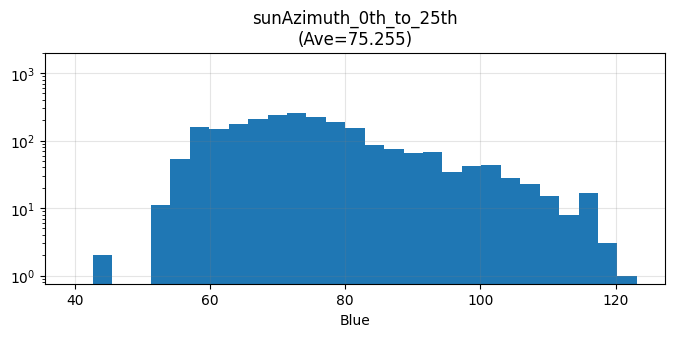

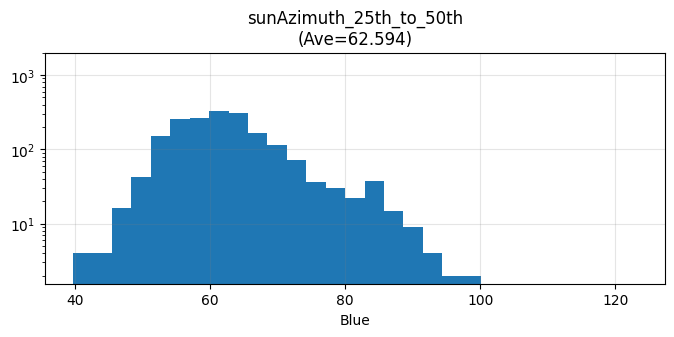

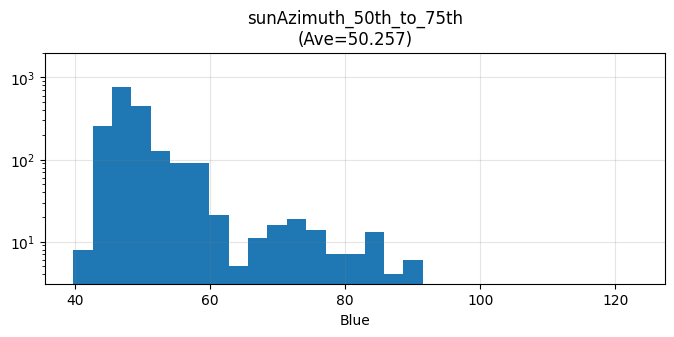

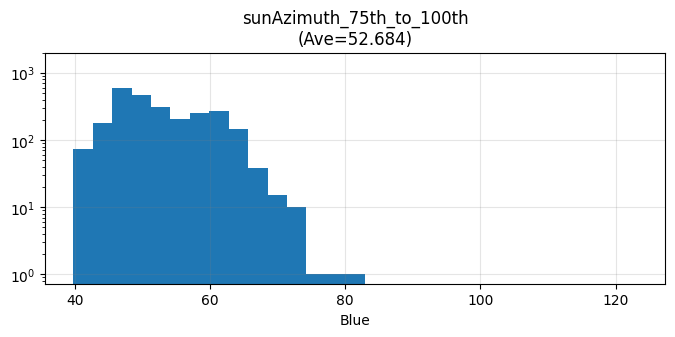

In [19]:
col = "sunAzimuth"
col_obj = "Blue"

p25 = train[col].quantile(0.25)
p50 = train[col].quantile(0.5)
p75 = train[col].quantile(0.75)

list_percentile = [p25, p50, p75]
bins = np.linspace(train[col_obj].min(), train[col_obj].max(), 30)

for i in range(4):
    if i == 0:
        tmp = train.loc[train[col]<p25, col_obj]
    elif i == 3:
        tmp = train.loc[train[col]>p75, col_obj]
    else:
        tmp = train.loc[(train[col]>list_percentile[i-1])&(train[col]<list_percentile[i]), col_obj]
    fig, ax = plt.subplots(figsize=(8, 3))
    ax.grid(alpha=0.2, color="gray")
    ax.hist(tmp, bins=bins)
    ax.set_title(f"{col}_{25*i}th_to_{25*(i+1)}th\n(Ave={tmp.mean():.3f})")
    ax.set_xlabel(col_obj)
    ax.set_yscale("log")
    ax.set_ylim([0, 2000])
    plt.show()

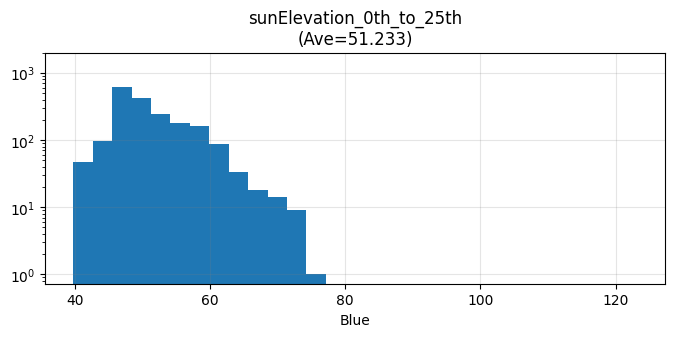

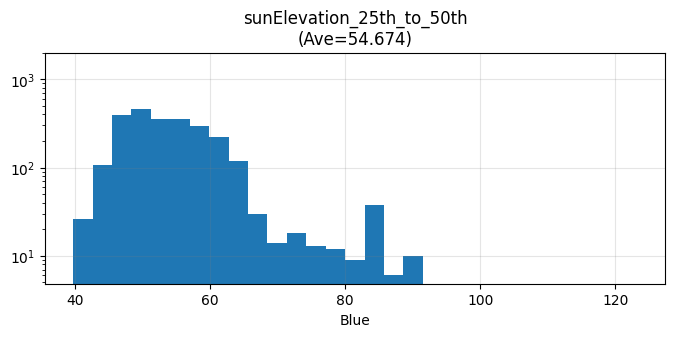

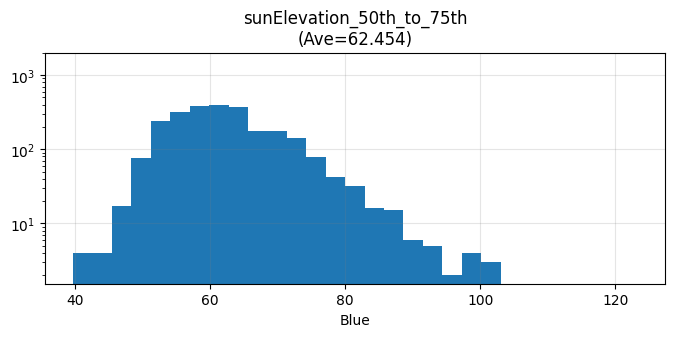

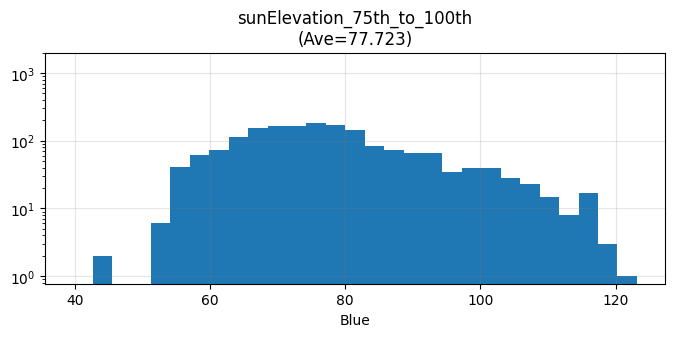

In [20]:
col = "sunElevation"
col_obj = "Blue"

p25 = train[col].quantile(0.25)
p50 = train[col].quantile(0.5)
p75 = train[col].quantile(0.75)

list_percentile = [p25, p50, p75]
bins = np.linspace(train[col_obj].min(), train[col_obj].max(), 30)

for i in range(4):
    if i == 0:
        tmp = train.loc[train[col]<p25, col_obj]
    elif i == 3:
        tmp = train.loc[train[col]>p75, col_obj]
    else:
        tmp = train.loc[(train[col]>list_percentile[i-1])&(train[col]<list_percentile[i]), col_obj]
    fig, ax = plt.subplots(figsize=(8, 3))
    ax.grid(alpha=0.2, color="gray")
    ax.hist(tmp, bins=bins)
    ax.set_title(f"{col}_{25*i}th_to_{25*(i+1)}th\n(Ave={tmp.mean():.3f})")
    ax.set_xlabel(col_obj)
    ax.set_yscale("log")
    ax.set_ylim([0, 2000])
    plt.show()

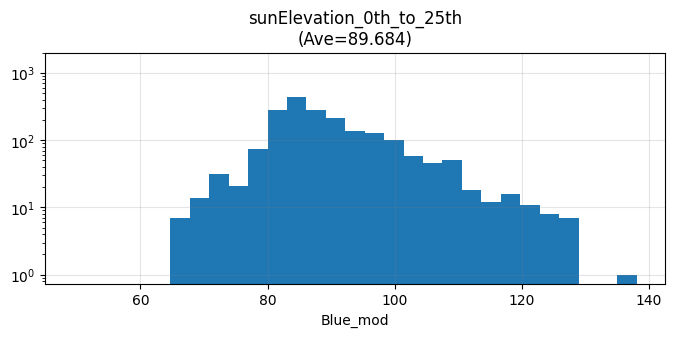

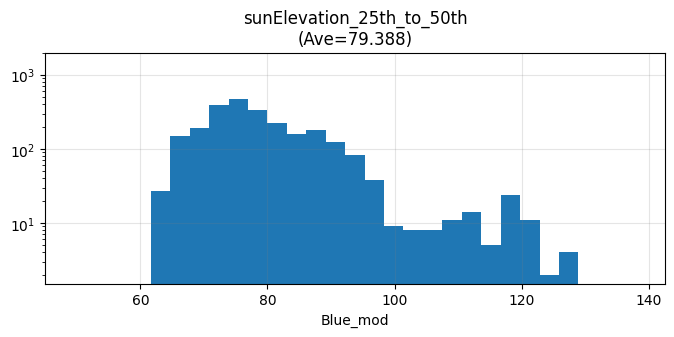

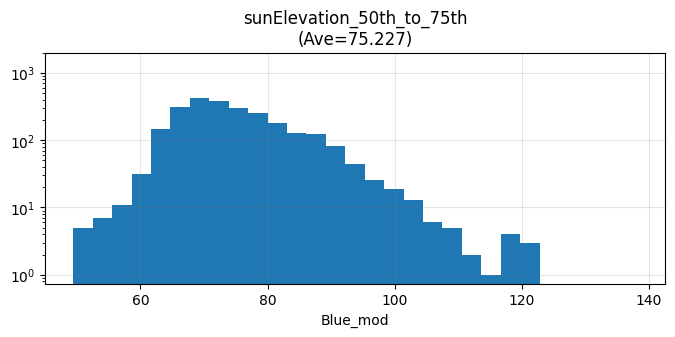

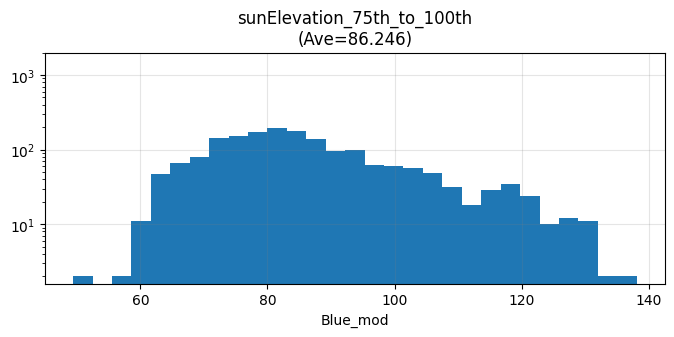

In [26]:
train["Blue_mod"] = train["Blue"] / np.cos(np.radians(90-train["sunElevation"]))

col = "sunElevation"
col_obj = "Blue_mod"

p25 = train[col].quantile(0.25)
p50 = train[col].quantile(0.5)
p75 = train[col].quantile(0.75)

list_percentile = [p25, p50, p75]
bins = np.linspace(train[col_obj].min(), train[col_obj].max(), 30)

for i in range(4):
    if i == 0:
        tmp = train.loc[train[col]<p25, col_obj]
    elif i == 3:
        tmp = train.loc[train[col]>p75, col_obj]
    else:
        tmp = train.loc[(train[col]>list_percentile[i-1])&(train[col]<list_percentile[i]), col_obj]
    fig, ax = plt.subplots(figsize=(8, 3))
    ax.grid(alpha=0.2, color="gray")
    ax.hist(tmp, bins=bins)
    ax.set_title(f"{col}_{25*i}th_to_{25*(i+1)}th\n(Ave={tmp.mean():.3f})")
    ax.set_xlabel(col_obj)
    ax.set_yscale("log")
    ax.set_ylim([0, 2000])
    plt.show()

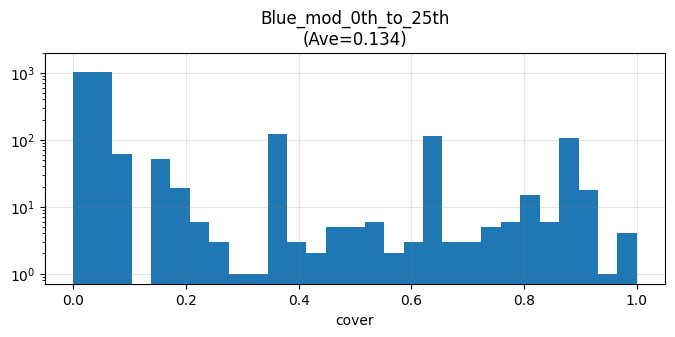

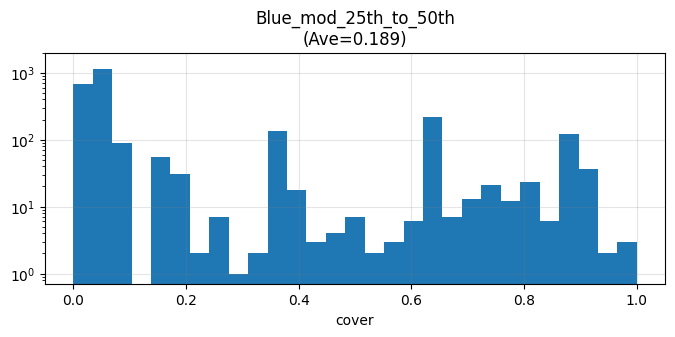

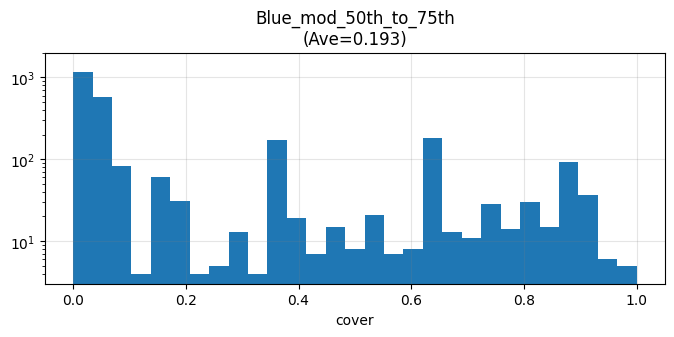

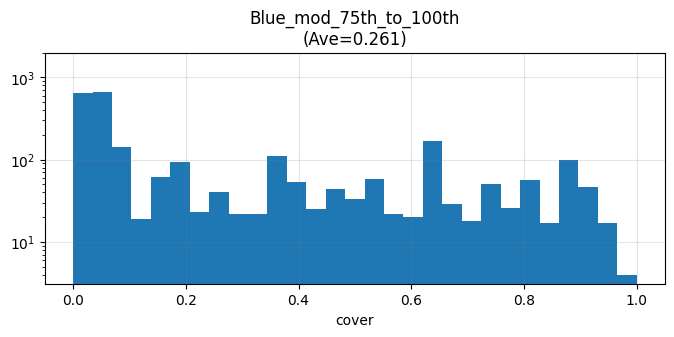

In [27]:
col = "Blue_mod"
col_obj = "cover"

p25 = train[col].quantile(0.25)
p50 = train[col].quantile(0.5)
p75 = train[col].quantile(0.75)

list_percentile = [p25, p50, p75]
bins = np.linspace(train[col_obj].min(), train[col_obj].max(), 30)

for i in range(4):
    if i == 0:
        tmp = train.loc[train[col]<p25, col_obj]
    elif i == 3:
        tmp = train.loc[train[col]>p75, col_obj]
    else:
        tmp = train.loc[(train[col]>list_percentile[i-1])&(train[col]<list_percentile[i]), col_obj]
    fig, ax = plt.subplots(figsize=(8, 3))
    ax.grid(alpha=0.2, color="gray")
    ax.hist(tmp, bins=bins)
    ax.set_title(f"{col}_{25*i}th_to_{25*(i+1)}th\n(Ave={tmp.mean():.3f})")
    ax.set_xlabel(col_obj)
    ax.set_yscale("log")
    ax.set_ylim([0, 2000])
    plt.show()